# Jugo project

In [2]:
import warnings
warnings.simplefilter("ignore")

## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

## Importing the necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Weather data
The weather data that is imported here is taken from the **WeatherDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a description about the different column name meanings.
### Importing the data

In [4]:
df = pd.read_csv("datasets/CleanWeather.csv")
df.head()

,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,1951-01-01,380,23,98.000000,0.0,90.158365,22.0,0.0,0.83167,53.267449,0.0,0.0,0.0,0.0,0.0,1,Winter,0
1,1951-01-01,310,3,87.000000,87.0,89.262892,14.0,0.0,0.83167,51.162157,0.0,0.0,0.0,0.0,0.0,1,Winter,0
2,1951-01-01,310,2,93.000000,0.0,89.261606,11.0,0.0,0.83167,51.603766,0.0,0.0,0.0,0.0,0.0,1,Winter,0
3,1951-01-01,310,1,93.000000,0.0,89.371168,9.0,0.0,0.83167,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,0
4,1951-01-01,290,24,60.025576,62.0,89.727013,21.0,0.0,0.83167,52.616341,0.0,0.0,0.0,0.0,0.0,1,Winter,0


In [5]:
df.shape

(19188675, 18)

### Checking missing data and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 18 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Date (YYYY-MM-DD)                  object 
 1   Station ID                         int64  
 2   Hour                               int64  
 3   Hourly Average Wind Speed (m/s)    float64
 4   Wind Speed (m/s)                   float64
 5   Highest Wind Gust (m/s)            float64
 6   Temperature (0.1°C)                float64
 7   Duration of Precipitation (hours)  float64
 8   Precipitation Amount (mm)          float64
 9   Visibility (m)                     float64
 10  Fog Indicator                      float64
 11  Rainfall Indicator                 float64
 12  Snow Indicator                     float64
 13  Thunderstorm Indicator             float64
 14  Ice Formation Indicator            float64
 15  Month                              int64  
 16  Season          

In [7]:
df.isna().sum()

Date (YYYY-MM-DD)                    0
Station ID                           0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
Month                                0
Season                               0
DOP Sector                           0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Traffic data
The traffic data that is imported here is taken from the **TrafficDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a data dictionary with data requirements. 
### Importing the data

In [8]:
traffic_data = pd.read_csv("datasets/CleanTraffic.csv")
traffic_data.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.0,5.617,45.6,47.9,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.0,14.533,31.4,28.2,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.0,1.600,166.5,169.7,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.0,11.517,82.8,85.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.0,9.517,144.3,140.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00


In [9]:
traffic_data.shape

(1581413, 28)

### Checking the data types and missing values

In [10]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581413 entries, 0 to 1581412
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TrafficJamNum        1581413 non-null  int64  
 1   StartDate            1581413 non-null  object 
 2   EndDate              1581413 non-null  object 
 3   StartTime            1581413 non-null  object 
 4   EndTime              1581413 non-null  object 
 5   Severity             1581413 non-null  float64
 6   Length               1581413 non-null  float64
 7   Duration             1581413 non-null  float64
 8   HectometerStart      1581413 non-null  float64
 9   HectometerEnd        1581413 non-null  float64
 10  RoadLetter           1581413 non-null  object 
 11  RoadNumber           1581413 non-null  int64  
 12  RoadDescr            1581413 non-null  object 
 13  HectometerDirection  1581413 non-null  object 
 14  RoadSectionFrom      1581413 non-null  object 
 15

In [11]:
traffic_data.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Weather stations data
The traffic data that is imported here is taken from the **WeatherStations&InitialEDA** file, where detailed steps about the cleaning of the dataset have been specified as well as a short data exploration.

### Importing the data and checking its quality

In [12]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

,STN,LON(east),LAT(north),ALT(m),NAME
0,209,4.518,52.465,0.0,IJmond
1,210,4.430,52.171,-0.2,Valkenburg Zh
2,215,4.437,52.141,-1.1,Voorschoten
3,225,4.555,52.463,4.4,IJmuiden
4,235,4.781,52.928,1.2,De Kooy


In [13]:
weather_stations.shape

(50, 5)

In [14]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [15]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data and the data types are correct. The rest of the exloration and cleaning of this dataset can be found in the **WeatherStations&InitialEDA** file. Therefore, it can be concluded that the data can be used further.

### Relevant weather stations
It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [16]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:2]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km
Station ID: 370, Distance: 27.93 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km
Station ID: 377, Distance: 23.30 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km
Station ID: 391, Distance: 23.77 km



# Data joining
## Data preparation for joining
### Weather data

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from the stations of interest. 

In [17]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

Apart from the weather stations, another important factor for the join is the date. We want to make sure that the dates in both dataset start and end at the same time.

In [18]:
print("Traffic data start:", traffic_data['StartDate'].min())
print("Traffic data end:", traffic_data['StartDate'].max())
print("Weather data start:", df['Date (YYYY-MM-DD)'].min())
print("Weather data end:", df['Date (YYYY-MM-DD)'].max())

max_start_date = max(traffic_data['StartDate'].min(), df['Date (YYYY-MM-DD)'].min())
min_end_date = min(traffic_data['StartDate'].max(), df['Date (YYYY-MM-DD)'].max())
print("--------------------------------------")
print("Start date:", max_start_date)
print("End date:", min_end_date)

Traffic data start: 2015-01-01
Traffic data end: 2024-02-29
Weather data start: 1951-01-01
Weather data end: 2024-03-25
--------------------------------------
Start date: 2015-01-01
End date: 2024-02-29


In [19]:
filtered_weather_data = df[(df['Date (YYYY-MM-DD)'] >= max_start_date) & (df['Date (YYYY-MM-DD)'] <= min_end_date)]
print("Minimum date:", filtered_weather_data['Date (YYYY-MM-DD)'].min(), "and maximum date:", filtered_weather_data['Date (YYYY-MM-DD)'].max())

Minimum date: 2015-01-01 and maximum date: 2024-02-29


In [20]:
filtered_weather_data = filtered_weather_data[filtered_weather_data['Station ID'].isin(unique_ids)]
print(filtered_weather_data.shape)
filtered_weather_data.sample(3)

(481968, 18)


,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
16917356,2018-08-26,380,19,40.0,50.0,70.0,170.0,0.0,1.0,83.0,0.0,1.0,0.0,0.0,0.0,8,Spring,1
16087552,2016-08-10,377,9,30.0,20.0,50.0,144.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,8,Summer,1
16202512,2016-11-22,380,14,50.0,60.0,80.0,122.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,11,Spring,1


After filtering for the relevant stations, we still have around half a million observations in the weather dataset.

In [21]:
hourlyobservations = filtered_weather_data.groupby(['Station ID', 'Date (YYYY-MM-DD)', 'Hour']).size()
hourlyobservations = hourlyobservations.reset_index(name='NumObs')
print("Min number of observations per hour:", hourlyobservations['NumObs'].min())
print("Max number of observations per hour:", hourlyobservations['NumObs'].max())

Min number of observations per hour: 1
Max number of observations per hour: 1


It seems that we have the weather indicators measured 1 time per hour in each relevant station. Therefore, we need to come up with a solution that would allow us to make sure that for each traffic jam we have weather data in place.

### Traffic data

It looks like there might be observations that contain traffic jams that continued from one day until the other. Therefore, when joining we need to carefully consider whether we want to join based on the start or end date and time.

In [22]:
traffic_data[traffic_data['StartDate'] != traffic_data['EndDate']] 

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
6536,3568729,2023-06-03,2023-06-04,23:52:22,0:31:03,111.825,2891.000,38.683,62.6,59.0,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 4], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-03 23:52:22,2023-06-04 00:31:03
11132,3571530,2023-06-05,2023-06-06,23:54:20,0:51:48,208.273,3624.000,57.467,55.1,50.1,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 10], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:54:20,2023-06-06 00:51:48
11133,3571532,2023-06-05,2023-06-06,23:59:20,1:34:20,264.233,2781.000,95.000,79.1,76.7,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 5], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:59:20,2023-06-06 01:34:20
13722,3576406,2023-06-07,2023-06-08,21:13:25,0:42:54,597.529,2852.000,209.483,44.1,41.3,...,Werkzaamheden (en file buiten spits zonder oor...,"[Geen oorzaakcode opgegeven door VWM 59], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 21:13:25,2023-06-08 00:42:54
14007,3576426,2023-06-07,2023-06-08,22:13:23,0:07:33,284.758,2494.000,114.167,15.4,12.8,...,File buiten spits zonder oorzaak (met werkzaam...,"[Geen oorzaakcode opgegeven door VWM 60], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 22:13:23,2023-06-08 00:07:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565809,2762411,2020-06-06,2020-06-07,23:52:00,0:45:47,161.350,3000.000,53.783,88.4,91.4,...,Ongeval (met ander incident),"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [N03]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-06 23:52:00,2020-06-07 00:45:47
1565832,2761918,2020-06-03,2020-06-04,23:46:00,0:27:21,123.900,2996.372,41.350,126.0,124.0,...,Ongeval(len),[Ongeval(len) 41],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-03 23:46:00,2020-06-04 00:27:21
1569022,2811903,2021-04-16,2021-04-17,21:32:00,0:07:07,456.083,2940.260,155.117,29.6,31.6,...,Werkzaamheden op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [N65], [RWK], [N60]",N60,Werkzaamheden op aansluitende weg,Werkzaamheden elders,Werkzaamheden,Aanleg en gepland onderhoud,2021-04-16 21:32:00,2021-04-17 00:07:07
1578595,2798351,2020-12-30,2020-12-31,18:57:00,1:16:19,1549.400,4084.714,379.317,95.3,93.3,...,Ongeval vrachtwagen (met spoedreparatie),"[Ongeval(len) 16], [Ongeval met vrachtwagen(s)...","[ACI], [ACH], [N32]",ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2020-12-30 18:57:00,2020-12-31 01:16:19


To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [23]:
traffic_data['Hour'] = traffic_data['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_data

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06,16
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01,16
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05,16
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00,16
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581408,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41,6
1581409,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32,16
1581410,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40,14
1581411,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27,16


#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.
An important observation is that **A2 leads from Sittard to 's-Hertogenbosch** and vice versa, whereas **A73 leads from Sittard to Boxmeer** and vice versa. Other routes are also possible, but they are significantly slower. Therefore, it is better to focus on those two only for now. Furthermore, they have been suggested by the client as the optimal routes.

In [24]:
filtered_traffic= traffic_data[(traffic_data['RoadDescr'] == 'A73') | (traffic_data['RoadDescr'] == 'A2')]
filtered_traffic

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.000,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.000,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.000,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.000,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.000,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581317,2757675,2020-04-23,2020-04-23,12:12:00,12:32:56,57.350,2739.650,20.933,162.3,164.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Defe...","[000], [BKD], [000]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident,2020-04-23 12:12:00,2020-04-23 12:32:56,12
1581348,2757792,2020-04-24,2020-04-24,13:35:00,13:45:06,20.200,2000.000,10.100,219.2,221.2,...,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [000]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-24 13:35:00,2020-04-24 13:45:06,13
1581392,2756631,2020-04-08,2020-04-08,12:58:00,15:06:07,405.883,3168.076,128.117,90.6,92.6,...,"[Geen oorzaakcode opgegeven door VWM 3], [Opru...","[000], [OCL], [HBD], [OCL]",HBD,Defecte vrachtwagen(s),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2020-04-08 12:58:00,2020-04-08 15:06:07,12
1581397,2756680,2020-04-09,2020-04-09,6:25:00,6:31:41,13.367,2000.000,6.683,68.9,70.9,...,"[Ongeval(len) 5], [Eerder(e) ongeval(len) 2]","[ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-09 06:25:00,2020-04-09 06:31:41,6


## Data joining
There are several types of joins:
* **Inner join** - An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
* **Left (outer) join** - A left join returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.
* **Right (outer) join** - A right join is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.
* **Semi-join** - A semi-join returns rows from the left table for which there are corresponding matching rows in the right table. Unlike regular joins which include the matching rows from both tables, a semi-join only includes columns from the left table in the result.
* **Anti-join** - An anti-join allows you to return all rows in one dataset that do not have matching values in another dataset. 
* **Full (outer) join** - A full join returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

Sources:
* https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
* https://www.statology.org/pandas-anti-join/
* https://www.geeksforgeeks.org/difference-between-anti-join-and-semi-join/

### Inner join version
For this kind of join, we are aiming at getting only the values that are matching in all tables.
#### Weather data and weather stations join

In [25]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,0.0,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,1
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,0.0,55.007178,0.0,0.0,0.0,0.0,0.0,1,Winter,1
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,0.0,55.157257,0.0,0.0,0.0,0.0,0.0,1,Winter,1
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,0.0,55.575877,0.0,0.0,0.0,0.0,0.0,1,Winter,1
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,0.0,56.345072,0.0,0.0,0.0,0.0,0.0,1,Winter,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481963,391,6.197,51.498,19.5,Arcen,2024-02-29,391,20,30.0,40.0,...,0.0,54.647627,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481964,391,6.197,51.498,19.5,Arcen,2024-02-29,391,21,40.0,30.0,...,0.0,54.249000,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481965,391,6.197,51.498,19.5,Arcen,2024-02-29,391,22,20.0,30.0,...,0.0,53.796479,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481966,391,6.197,51.498,19.5,Arcen,2024-02-29,391,23,30.0,30.0,...,0.0,53.267449,0.0,0.0,0.0,0.0,0.0,2,Winter,1


In [26]:
filtered_traffic.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.0,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.0,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.0,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.0,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.0,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7


In [27]:
filtered_traffic.loc[:, 'StartDate'] = pd.to_datetime(filtered_traffic['StartDate'])

# Create a new column combining StartDate and Hour in the desired format
filtered_traffic.loc[:, 'StartDateTime'] = filtered_traffic.apply(
    lambda row: f"{row['StartDate'].strftime('%Y-%m-%d')}-{row['Hour']:02d}", axis=1
)

# Display the DataFrame
print(filtered_traffic['StartDateTime'])

7          2023-06-13-17
41         2023-06-13-18
61         2023-06-14-07
66         2023-06-14-07
74         2023-06-14-07
               ...      
1581317    2020-04-23-12
1581348    2020-04-24-13
1581392    2020-04-08-12
1581397    2020-04-09-06
1581404    2020-04-09-06
Name: StartDateTime, Length: 191585, dtype: object


In [28]:
#grouped_traffic = filtered_traffic.groupby('StartDateTime', as_index=False)['Duration'].sum()
#grouped_traffic['StartDateTime']

In [291]:
import itertools
unique_startdates = filtered_traffic['StartDateTime'].unique()
unique_roaddescr = filtered_traffic['RoadDescr'].unique()

all_combinations = pd.DataFrame(list(itertools.product(unique_startdates, unique_roaddescr)), columns=['StartDateTime', 'RoadDescr'])


In [435]:
filtered_traffic = filtered_traffic[filtered_traffic['HectometerDirection'] == 'oplopend']


In [293]:
ttraffic = filtered_traffic.groupby(['StartDateTime', 'RoadDescr'], as_index=False).agg({
    'Duration': 'mean',
    'Length': 'mean',
    'Severity': 'mean',
})


ttraffic['StartDateTime']

0        2015-01-05-07
1        2015-01-05-08
2        2015-01-05-09
3        2015-01-05-15
4        2015-01-05-17
             ...      
18060    2024-02-29-16
18061    2024-02-29-17
18062    2024-02-29-17
18063    2024-02-29-18
18064    2024-02-29-18
Name: StartDateTime, Length: 18065, dtype: object

In [505]:
ttraffic = filtered_traffic.copy()

In [506]:
filtered_traffic.shape

(100648, 29)

In [507]:
ttraffic.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
41,3589794,2023-06-13 00:00:00,2023-06-13,18:37:28,18:43:00,16.465,2976.0,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13-18,2023-06-13 18:43:00,18
61,3590025,2023-06-14 00:00:00,2023-06-14,7:12:25,7:25:02,41.488,3288.0,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-07,2023-06-14 07:25:02,7
66,3590065,2023-06-14 00:00:00,2023-06-14,7:25:25,8:07:00,216.928,5217.0,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-07,2023-06-14 08:07:00,7
74,3590164,2023-06-14 00:00:00,2023-06-14,7:49:26,7:51:00,3.447,2200.0,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-07,2023-06-14 07:51:00,7
89,3590356,2023-06-14 00:00:00,2023-06-14,8:29:27,8:52:00,46.173,2048.0,22.550,64.7,63.6,...,[Geen oorzaakcode opgegeven door VWM 23],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-08,2023-06-14 08:52:00,8


In [508]:
ttraffic= ttraffic[ttraffic['RoadDescr'] == 'A2']

In [509]:
ttraffic['RoadDescr']

41         A2
74         A2
89         A2
138        A2
139        A2
           ..
1581177    A2
1581190    A2
1581235    A2
1581245    A2
1581314    A2
Name: RoadDescr, Length: 87173, dtype: object

In [510]:
ttraffic['StartDateTime'] = pd.to_datetime(ttraffic['StartDateTime'], format='%Y-%m-%d-%H')

from datetime import datetime

start_date = '2015-01-01'
end_date = datetime(datetime.now().year, 2, 29, 23)  # End of February current year, adjusting for leap years
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Convert the date range to the desired format YYYY-MM-DD-HH
date_range_str = date_range.strftime('%Y-%m-%d-%H')



# Creating a new dataframe with the complete date range
complete_df = pd.DataFrame(date_range, columns=['StartDateTime'])

# Merging the original dataframe with the complete date range dataframe
merged_df = complete_df.merge(ttraffic, on='StartDateTime', how='left')

# Forward fill to propagate last valid observation forward
merged_df


,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,EndDateTime,Hour
0,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153549,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153550,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153551,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153552,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [445]:
from datetime import datetime

start_date = '2015-01-01'
end_date = datetime(datetime.now().year, 2, 29, 23)  # End of February current year, adjusting for leap years
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Convert the date range to the desired format YYYY-MM-DD-HH
date_range_str = date_range.strftime('%Y-%m-%d-%H')

# Create a DataFrame from the date range
full_date_range_df = pd.DataFrame(date_range_str, columns=['StartDateTime'])

# Merge with the grouped_traffic DataFrame
ttraffic = pd.merge(full_date_range_df, ttraffic, on='StartDateTime', how='left')

# Fill missing Duration values with 0
ttraffic['Duration'] = ttraffic['Duration'].fillna(0)

# Display the modified grouped_traffic DataFrame
print(ttraffic)

        StartDateTime  TrafficJamNum StartDate EndDate StartTime EndTime  \
0       2015-01-01-00            NaN       NaN     NaN       NaN     NaN   
1       2015-01-01-01            NaN       NaN     NaN       NaN     NaN   
2       2015-01-01-02            NaN       NaN     NaN       NaN     NaN   
3       2015-01-01-03            NaN       NaN     NaN       NaN     NaN   
4       2015-01-01-04            NaN       NaN     NaN       NaN     NaN   
...               ...            ...       ...     ...       ...     ...   
153549  2024-02-29-19            NaN       NaN     NaN       NaN     NaN   
153550  2024-02-29-20            NaN       NaN     NaN       NaN     NaN   
153551  2024-02-29-21            NaN       NaN     NaN       NaN     NaN   
153552  2024-02-29-22            NaN       NaN     NaN       NaN     NaN   
153553  2024-02-29-23            NaN       NaN     NaN       NaN     NaN   

        Severity  Length  Duration  HectometerStart  ...  CauseCodeDescr  \
0          

In [298]:
ttraffic_full = pd.merge(all_combinations, ttraffic, on=['StartDateTime', 'RoadDescr'], how='right')

# Fill NaN values with appropriate defaults if necessary
ttraffic_full['Duration'] = ttraffic_full['Duration'].fillna(0, inplace=True)
ttraffic_full['Length'] = ttraffic_full['Length'].fillna(0, inplace=True)  # Or another default value
ttraffic_full['Severity'] = ttraffic_full['Severity'].fillna(0, inplace=True)  # Or another default value

# Ensure StartDateTime is in datetime format
ttraffic_full['StartDateTime'] = pd.to_datetime(ttraffic_full['StartDateTime'], format='%Y-%m-%d-%H', errors='coerce')

# Filter for rows corresponding to January 1st
january_1_data = ttraffic_full[ttraffic_full['StartDateTime'].dt.strftime('%Y-%m-%d') == '2023-06-13']

# Display the filtered data
print(january_1_data)

            StartDateTime RoadDescr Duration Length Severity
74040 2023-06-13 00:00:00       NaN     None   None     None
74041 2023-06-13 01:00:00       NaN     None   None     None
74042 2023-06-13 02:00:00       NaN     None   None     None
74043 2023-06-13 03:00:00       NaN     None   None     None
74044 2023-06-13 04:00:00        A2     None   None     None
74045 2023-06-13 05:00:00       NaN     None   None     None
74046 2023-06-13 06:00:00       NaN     None   None     None
74047 2023-06-13 07:00:00        A2     None   None     None
74048 2023-06-13 08:00:00        A2     None   None     None
74049 2023-06-13 09:00:00        A2     None   None     None
74050 2023-06-13 10:00:00       NaN     None   None     None
74051 2023-06-13 11:00:00       NaN     None   None     None
74052 2023-06-13 12:00:00       NaN     None   None     None
74053 2023-06-13 13:00:00       NaN     None   None     None
74054 2023-06-13 14:00:00       NaN     None   None     None
74055 2023-06-13 15:00:0

In [454]:
ttraffic.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
41,3589794,2023-06-13 00:00:00,2023-06-13,18:37:28,18:43:00,16.465,2976.0,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:00:00,2023-06-13 18:43:00,18
74,3590164,2023-06-14 00:00:00,2023-06-14,7:49:26,7:51:00,3.447,2200.0,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:00:00,2023-06-14 07:51:00,7
89,3590356,2023-06-14 00:00:00,2023-06-14,8:29:27,8:52:00,46.173,2048.0,22.550,64.7,63.6,...,[Geen oorzaakcode opgegeven door VWM 23],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 08:00:00,2023-06-14 08:52:00,8
138,3590852,2023-06-14 00:00:00,2023-06-14,14:00:27,14:08:00,22.095,2926.0,7.550,100.5,93.5,...,[Geen oorzaakcode opgegeven door VWM 8],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 14:00:00,2023-06-14 14:08:00,14
139,3590853,2023-06-14 00:00:00,2023-06-14,14:00:27,14:02:00,3.255,2100.0,1.550,111.1,109.0,...,[Geen oorzaakcode opgegeven door VWM 2],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 14:00:00,2023-06-14 14:02:00,14


In [511]:
merged_df.isna().sum()

StartDateTime              0
TrafficJamNum          66381
StartDate              66381
EndDate                66381
StartTime              66381
EndTime                66381
Severity               66381
Length                 66381
Duration               66381
HectometerStart        66381
HectometerEnd          66381
RoadLetter             66381
RoadNumber             66381
RoadDescr              66381
HectometerDirection    66381
RoadSectionFrom        66381
RoadSectionTo          66381
MainRoadFrom           66381
MainRoadTo             66381
CauseCodeDescr         66381
CauseClass             66381
CauseCodeClass         66381
CauseCode              66381
Cause_1                66381
Cause_2                66381
Cause_3                66381
Cause_4                66381
EndDateTime            66381
Hour                   66381
dtype: int64

In [244]:
ttraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StartDateTime  80328 non-null  object 
 1   Duration       80328 non-null  float64
 2   Length         13947 non-null  float64
 3   Severity       13947 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.5+ MB


In [512]:
merged_weather_data.loc[:, 'Date (YYYY-MM-DD)'] = pd.to_datetime(merged_weather_data['Date (YYYY-MM-DD)'])

# Create a new column combining StartDate and Hour in the desired format
merged_weather_data.loc[:, 'StartDateTime'] = merged_weather_data.apply(
    lambda row: f"{row['Date (YYYY-MM-DD)'].strftime('%Y-%m-%d')}-{row['Hour']:02d}", axis=1
)

# Display the DataFrame
print(merged_weather_data['StartDateTime'])

0         2015-01-01-01
1         2015-01-01-19
2         2015-01-01-18
3         2015-01-01-17
4         2015-01-01-16
              ...      
481963    2024-02-29-20
481964    2024-02-29-21
481965    2024-02-29-22
481966    2024-02-29-23
481967    2024-02-29-09
Name: StartDateTime, Length: 481968, dtype: object


In [247]:
merged_weather_data.isna().sum()

STN                                  0
LON(east)                            0
LAT(north)                           0
ALT(m)                               0
NAME                                 0
Date (YYYY-MM-DD)                    0
Station ID                           0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
Month                                0
Season                               0
DOP Sector                           0
StartDateTime                        0
dtype: int64

In [513]:
merged_weather_dataaa = merged_weather_data.groupby(['StartDateTime'], as_index=False).agg({
    'Fog Indicator': 'mean',
    'Rainfall Indicator': 'mean',
    'Thunderstorm Indicator': 'mean',
    'Snow Indicator': 'mean',
    'Wind Speed (m/s)' : 'first',
    'Highest Wind Gust (m/s) ': 'mean',
    'Duration of Precipitation (hours)': 'mean',
    'Visibility (m)': 'mean', 
    'Precipitation Amount (mm)': 'mean',
    'Season': 'first',
    'Temperature (0.1°C)': 'mean',
    'DOP Sector': 'first'
})
merged_weather_dataaa['StartDateTime']

0        2015-01-01-01
1        2015-01-01-02
2        2015-01-01-03
3        2015-01-01-04
4        2015-01-01-05
             ...      
80323    2024-02-29-20
80324    2024-02-29-21
80325    2024-02-29-22
80326    2024-02-29-23
80327    2024-02-29-24
Name: StartDateTime, Length: 80328, dtype: object

In [514]:
merged_weather_dataaa.head()

,StartDateTime,Fog Indicator,Rainfall Indicator,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector
0,2015-01-01-01,0.333333,0.0,0.0,0.0,40.0,45.000000,0.0,25.679159,0.0,Winter,0.666667,1
1,2015-01-01-02,0.333333,0.0,0.0,0.0,50.0,46.666667,0.0,25.034589,0.0,Winter,0.833333,1
2,2015-01-01-03,0.500000,0.0,0.0,0.0,50.0,53.333333,0.0,25.887386,0.0,Winter,2.500000,1
3,2015-01-01-04,0.333333,0.0,0.0,0.0,40.0,56.666667,0.0,31.619510,0.0,Winter,0.666667,1
4,2015-01-01-05,0.333333,0.0,0.0,0.0,40.0,45.000000,0.0,27.374241,0.0,Winter,-7.000000,1


In [280]:
merged = pd.merge(ttraffic, merged_weather_dataaa, left_on=['StartDateTime'], right_on=['StartDateTime'], how = "left")
nan_columns = merged.columns[merged.isna().any()]

print(merged[nan_columns].isna().sum())


Length                               66381
Severity                             66381
Fog Indicator                         3347
Rainfall Indicator                    3347
Thunderstorm Indicator                3347
Snow Indicator                        3347
Wind Speed (m/s)                      3347
Highest Wind Gust (m/s)               3347
Duration of Precipitation (hours)     3347
Visibility (m)                        3347
Precipitation Amount (mm)             3347
Season                                3347
Temperature (0.1°C)                   3347
DOP Sector                            3347
dtype: int64


In [281]:
merged.shape

(80328, 16)

In [515]:
merged_data

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.000000,25.679159,0.000000,Winter,0.666667,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,46.666667,0.000000,25.034589,0.000000,Winter,0.833333,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,53.333333,0.000000,25.887386,0.000000,Winter,2.500000,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,56.666667,0.000000,31.619510,0.000000,Winter,0.666667,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.000000,27.374241,0.000000,Winter,-7.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150198,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,66.666667,2.833333,66.002393,1.666667,Winter,92.500000,3
150199,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,68.333333,0.000000,67.049209,0.166667,Winter,92.166667,1
150200,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,68.333333,1.500000,66.916333,1.833333,Winter,87.833333,2
150201,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,68.333333,1.333333,69.598826,1.000000,Winter,90.000000,2


In [479]:
merged_df['StartDateTime'].dtypes

dtype('<M8[ns]')

In [516]:
merged_weather_dataaa['StartDateTime'].dtypes

dtype('O')

In [517]:
import pandas as pd

# Convert the StartDateTime column in merged_weather_dataaa to datetime64[ns] type
merged_weather_dataaa['StartDateTime'] = pd.to_datetime(merged_weather_dataaa['StartDateTime'], format='%Y-%m-%d-%H', errors='coerce')

# Drop rows where conversion to datetime failed
merged_weather_dataaa = merged_weather_dataaa.dropna(subset=['StartDateTime'])

# Perform the merge
merged_data = pd.merge(merged_df, merged_weather_dataaa, on='StartDateTime')

# Identify columns with NaN values
nan_columns = merged_data.columns[merged_data.isna().any()]

# Print the count of NaN values in those columns
print(merged_data)


             StartDateTime  TrafficJamNum StartDate EndDate StartTime EndTime  \
0      2015-01-01 01:00:00            NaN       NaN     NaN       NaN     NaN   
1      2015-01-01 02:00:00            NaN       NaN     NaN       NaN     NaN   
2      2015-01-01 03:00:00            NaN       NaN     NaN       NaN     NaN   
3      2015-01-01 04:00:00            NaN       NaN     NaN       NaN     NaN   
4      2015-01-01 05:00:00            NaN       NaN     NaN       NaN     NaN   
...                    ...            ...       ...     ...       ...     ...   
150198 2024-02-29 19:00:00            NaN       NaN     NaN       NaN     NaN   
150199 2024-02-29 20:00:00            NaN       NaN     NaN       NaN     NaN   
150200 2024-02-29 21:00:00            NaN       NaN     NaN       NaN     NaN   
150201 2024-02-29 22:00:00            NaN       NaN     NaN       NaN     NaN   
150202 2024-02-29 23:00:00            NaN       NaN     NaN       NaN     NaN   

        Severity  Length  D

In [478]:
merged_data = pd.merge(merged_df, merged_weather_dataaa, left_on=['StartDateTime'], right_on=['StartDateTime'])
nan_columns = merged_data.columns[merged_data.isna().any()]

print(merged_data[nan_columns].isna().sum())

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'StartDateTime'. If you wish to proceed you should use pd.concat

In [283]:
merged_data.shape

(76981, 16)

In [518]:
merged_data[['Year', 'Month', 'Day', 'Hour']] = merged_data['StartDateTime'].str.split('-', expand=True)

# Convert the new columns to appropriate data types
merged_data['Year'] = merged_data['Year'].astype(int)
merged_data['Month'] = merged_data['Month'].astype(int)
merged_data['Day'] = merged_data['Day'].astype(int)
merged_data['Hour'] = merged_data['Hour'].astype(int)


AttributeError: Can only use .str accessor with string values!

In [285]:
merged_data['StartDateTime'] = pd.to_datetime(merged_data['StartDateTime'])
merged_data['Weekday'] = merged_data['StartDateTime'].dt.weekday
merged_data.head()

,StartDateTime,Duration,Length,Severity,Fog Indicator,Rainfall Indicator,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),...,Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Year,Month,Day,Hour,Weekday
0,2015-01-01 01:00:00,0.0,NaN,NaN,0.333333,0.0,0.0,0.0,40.0,45.000000,...,25.679159,0.0,Winter,0.666667,1,2015,1,1,1,3
1,2015-01-01 02:00:00,0.0,NaN,NaN,0.333333,0.0,0.0,0.0,50.0,46.666667,...,25.034589,0.0,Winter,0.833333,1,2015,1,1,2,3
2,2015-01-01 03:00:00,0.0,NaN,NaN,0.500000,0.0,0.0,0.0,50.0,53.333333,...,25.887386,0.0,Winter,2.500000,1,2015,1,1,3,3
3,2015-01-01 04:00:00,0.0,NaN,NaN,0.333333,0.0,0.0,0.0,40.0,56.666667,...,31.619510,0.0,Winter,0.666667,1,2015,1,1,4,3
4,2015-01-01 05:00:00,0.0,NaN,NaN,0.333333,0.0,0.0,0.0,40.0,45.000000,...,27.374241,0.0,Winter,-7.000000,1,2015,1,1,5,3


In [519]:
merged_data['Severity'] = merged_data['Severity'].fillna(0)
merged_data['Length'] = merged_data['Length'].fillna(0)
merged_data['Duration'] = merged_data['Duration'].fillna(0)


In [486]:
merged_data.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.0,25.679159,0.0,Winter,0.666667,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,46.666667,0.0,25.034589,0.0,Winter,0.833333,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,53.333333,0.0,25.887386,0.0,Winter,2.500000,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,56.666667,0.0,31.619510,0.0,Winter,0.666667,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.0,27.374241,0.0,Winter,-7.000000,1


In [288]:
def handle_nan_roaddescr(df):
    # Create a mask for rows where RoadDescr is NaN
    nan_mask = df['RoadDescr'].isna()

    # Create a DataFrame with the NaN rows duplicated and RoadDescr filled with 'A2' and 'A73'
    nan_rows = df[nan_mask].copy()
    nan_rows_A2 = nan_rows.copy()
    nan_rows_A2['RoadDescr'] = 'A2'
    nan_rows_A73 = nan_rows.copy()
    nan_rows_A73['RoadDescr'] = 'A73'

    # Combine original DataFrame without NaNs with the new rows
    df_without_nan = df[~nan_mask]
    df_with_handled_nan = pd.concat([df_without_nan, nan_rows_A2, nan_rows_A73], ignore_index=True)

    return df_with_handled_nan

# Process the DataFrame to handle NaN in RoadDescr
processed_traffic = handle_nan_roaddescr(merged_data)

# Display the result
print(processed_traffic.head())

KeyError: 'RoadDescr'

In [289]:
processed_traffic.shape

(142324, 23)

In [487]:
processed_traffic['StartDateTime'] = pd.to_datetime(processed_traffic['StartDateTime'])

def get_season_numerical(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
processed_traffic['Season Numerical'] = processed_traffic['StartDateTime'].dt.month.apply(get_season_numerical)

processed_traffic.sample(3)

,StartDateTime,RoadDescr,Duration,Length,Severity,Fog Indicator,Rainfall Indicator,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),...,Temperature (0.1°C),DOP Sector,Year,Month,Day,Hour,Weekday,Season Numerical,Holiday,Date
48777,2019-08-05 02:00:00,A2,0.00000,0.0000,0.0,0.0,0.5,0.0,0.0,20.0,...,185.166667,1,2019,8,5,2,0,2,0,2019-08-05
18529,2015-01-26 05:00:00,A2,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,40.0,...,32.166667,1,2015,1,26,5,0,0,0,2015-01-26
469,2015-04-29 16:00:00,A2,8.15825,2317.8105,22.8,0.0,0.0,0.0,0.0,70.0,...,138.333333,1,2015,4,29,16,2,1,0,2015-04-29


In [299]:
processed_traffic = processed_traffic[processed_traffic['RoadDescr'] == 'A2']
processed_traffic['RoadDescr']

0        A2
1        A2
2        A2
3        A2
4        A2
         ..
80174    A2
80175    A2
80176    A2
80177    A2
80178    A2
Name: RoadDescr, Length: 76065, dtype: object

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

From the inner join above, we expect 481.968 as these are the number of rows in the weather dataframe that should have an exact match in the weather stations data since the primary key is the Station ID. That is exactly what we get.

#### Merged weather data and traffic jams join
First, since our target variable is located in the traffic dataset, let's perform a right join with it being the right table in order to see if there are any rows in the weather data that are missing for the traffic data.

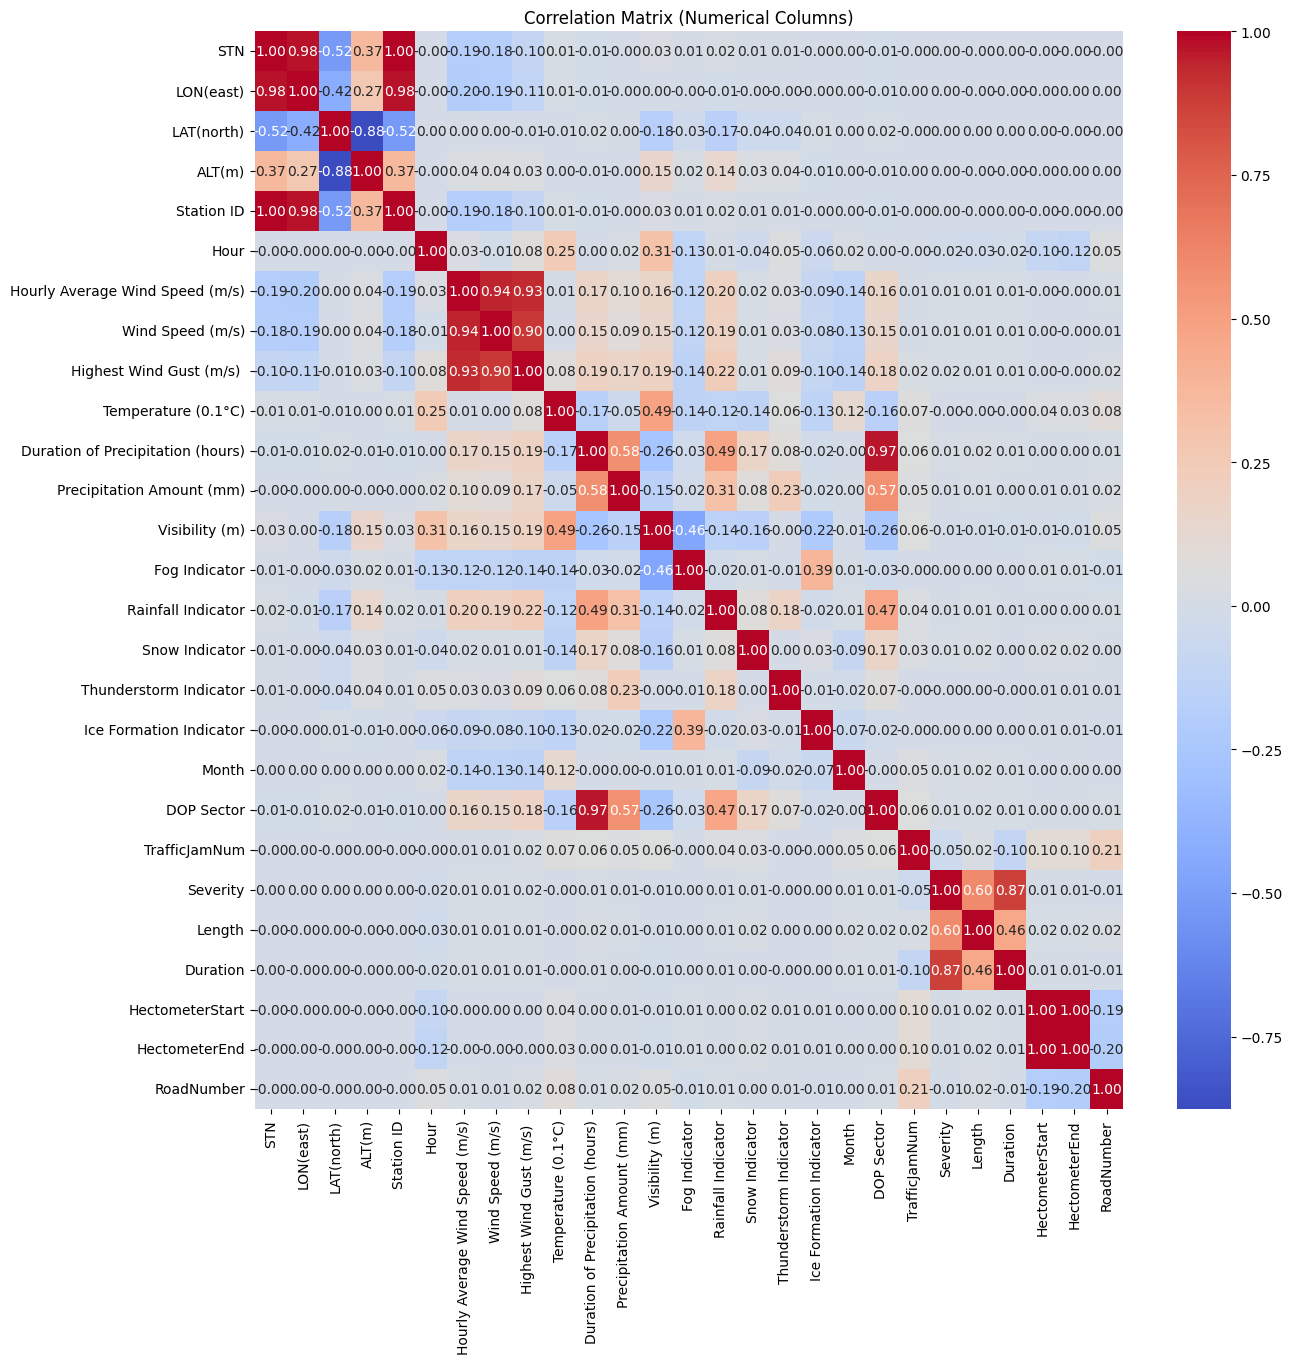

In [73]:
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

Still no relevant correlation :-(

- holidays
- verify addition of season code
- two ways separate (going to work and going home)

# Modelling

## Random Forest


In [489]:
processed_traffic.head()

(76065, 25)

In [490]:
merged_data.shape

(150203, 41)

In [491]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the range of years
start_year = 2015
end_year = 2024

# Create an empty list to store the scraped data
data = []

# Iterate over the years
for year in range(start_year, end_year + 1):
    # URL of the webpage containing the table for the current year
    url = f'https://www.timeanddate.com/holidays/netherlands/{year}?hol=9'

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the webpage
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table element with ID 'holidays-table'
        table = soup.find('table', id='holidays-table')

        # Check if the table is found
        if table:
            # Extract the table rows
            rows = table.find_all('tr')

            # Iterate over the rows and extract the data
            for row in rows:
                # Extract the table cells (columns) from each row
                cells = row.find_all(['th', 'td'])

                # Extract text from each cell and append it to the data list
                row_data = [cell.get_text(strip=True) for cell in cells]
                data.append([year] + row_data)  # Include the year as the first element
        else:
            print(f'Table with ID "holidays-table" not found for the year {year}.')
    else:
        print(f'Failed to retrieve webpage for the year {year}:', response.status_code)

# Create a DataFrame from the scraped data
columns = ['Year', 'Date', 'Day', 'Name', 'Type']
holiday = pd.DataFrame(data, columns=columns)
holiday = holiday.iloc[1:]

# Filter the DataFrame to include only rows where Type is 'Public Holiday'
holiday = holiday[holiday['Type'] == 'Public Holiday']

# Display a random sample of 5 rows from the DataFrame
print(holiday.sample(5))

     Year    Date       Day                     Name            Type
350  2024  29 mrt   vrijdag              Good Friday  Public Holiday
264  2021  26 dec    zondag  Second Day of Christmas  Public Holiday
353  2024   1 apr   maandag            Easter Monday  Public Holiday
85   2017  14 apr   vrijdag              Good Friday  Public Holiday
150  2018  26 dec  woensdag  Second Day of Christmas  Public Holiday


In [492]:
df = holiday.copy()

In [493]:
month_mapping = {
    "jan": "01",
    "feb": "02",
    "mrt": "03",
    "apr": "04",
    "mei": "05",
    "jun": "06",
    "jul": "07",
    "aug": "08",
    "sep": "09",
    "okt": "10",
    "nov": "11",
    "dec": "12"
}

def map_month(date):
    try:
        day, month = date.split()
        month = month_mapping.get(month, "01")  # Default to "01" if month is not found
        return f"{day}-{month}"
    except ValueError:
        return date  # Return the original date if it doesn't split correctly

# Applying the function to create a new Date column with numerical month values
df["Date"] = df["Date"].apply(map_month)

df

,Year,Date,Day,Name,Type
3,2015,1-01,donderdag,New Year's Day,Public Holiday
9,2015,3-04,vrijdag,Good Friday,Public Holiday
10,2015,5-04,zondag,Easter Sunday,Public Holiday
11,2015,6-04,maandag,Easter Monday,Public Holiday
12,2015,27-04,maandag,King's Birthday,Public Holiday
...,...,...,...,...,...
358,2024,9-05,donderdag,Ascension Day,Public Holiday
360,2024,19-05,zondag,Whit Sunday,Public Holiday
361,2024,20-05,maandag,Whit Monday,Public Holiday
377,2024,25-12,woensdag,Christmas Day,Public Holiday


In [494]:
df["YearAndDate"] = df["Year"].astype(str) + "-" + df["Date"]

# Dropping the original Year and Date columns
df = df.drop(columns=["Year", "Date"])
df

,Day,Name,Type,YearAndDate
3,donderdag,New Year's Day,Public Holiday,2015-1-01
9,vrijdag,Good Friday,Public Holiday,2015-3-04
10,zondag,Easter Sunday,Public Holiday,2015-5-04
11,maandag,Easter Monday,Public Holiday,2015-6-04
12,maandag,King's Birthday,Public Holiday,2015-27-04
...,...,...,...,...
358,donderdag,Ascension Day,Public Holiday,2024-9-05
360,zondag,Whit Sunday,Public Holiday,2024-19-05
361,maandag,Whit Monday,Public Holiday,2024-20-05
377,woensdag,Christmas Day,Public Holiday,2024-25-12


In [495]:
# Adding a new column 'Holiday' with values of 1
df["Holiday"] = 1

df

,Day,Name,Type,YearAndDate,Holiday
3,donderdag,New Year's Day,Public Holiday,2015-1-01,1
9,vrijdag,Good Friday,Public Holiday,2015-3-04,1
10,zondag,Easter Sunday,Public Holiday,2015-5-04,1
11,maandag,Easter Monday,Public Holiday,2015-6-04,1
12,maandag,King's Birthday,Public Holiday,2015-27-04,1
...,...,...,...,...,...
358,donderdag,Ascension Day,Public Holiday,2024-9-05,1
360,zondag,Whit Sunday,Public Holiday,2024-19-05,1
361,maandag,Whit Monday,Public Holiday,2024-20-05,1
377,woensdag,Christmas Day,Public Holiday,2024-25-12,1


In [496]:
def convert_date_format(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%d-%m', errors='coerce').strftime('%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%Y-%m-%d').strftime('%Y-%m-%d')

# Applying the function to the 'YearAndDate' column
df['YearAndDate'] = df['YearAndDate'].apply(convert_date_format)

# Display the transformed dataframe
print(df)

           Day                     Name            Type YearAndDate  Holiday
3    donderdag           New Year's Day  Public Holiday  2015-01-01        1
9      vrijdag              Good Friday  Public Holiday  2015-04-03        1
10      zondag            Easter Sunday  Public Holiday  2015-04-05        1
11     maandag            Easter Monday  Public Holiday  2015-04-06        1
12     maandag          King's Birthday  Public Holiday  2015-04-27        1
..         ...                      ...             ...         ...      ...
358  donderdag            Ascension Day  Public Holiday  2024-05-09        1
360     zondag              Whit Sunday  Public Holiday  2024-05-19        1
361    maandag              Whit Monday  Public Holiday  2024-05-20        1
377   woensdag            Christmas Day  Public Holiday  2024-12-25        1
378  donderdag  Second Day of Christmas  Public Holiday  2024-12-26        1

[102 rows x 5 columns]


In [497]:
df = df.drop(columns=['Day'])
df

,Name,Type,YearAndDate,Holiday
3,New Year's Day,Public Holiday,2015-01-01,1
9,Good Friday,Public Holiday,2015-04-03,1
10,Easter Sunday,Public Holiday,2015-04-05,1
11,Easter Monday,Public Holiday,2015-04-06,1
12,King's Birthday,Public Holiday,2015-04-27,1
...,...,...,...,...
358,Ascension Day,Public Holiday,2024-05-09,1
360,Whit Sunday,Public Holiday,2024-05-19,1
361,Whit Monday,Public Holiday,2024-05-20,1
377,Christmas Day,Public Holiday,2024-12-25,1


In [395]:
df = df.drop(columns=['Name'])
df

,Type,YearAndDate,Holiday
3,Public Holiday,2015-01-01,1
9,Public Holiday,2015-03-04,1
10,Public Holiday,2015-05-04,1
11,Public Holiday,2015-06-04,1
12,Public Holiday,2015-04-27,1
...,...,...,...
358,Public Holiday,2024-09-05,1
360,Public Holiday,2024-05-19,1
361,Public Holiday,2024-05-20,1
377,Public Holiday,2024-12-25,1


In [499]:
last = merged_data.copy()


In [500]:
last

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.000000,25.679159,0.000000,Winter,0.666667,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,46.666667,0.000000,25.034589,0.000000,Winter,0.833333,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,53.333333,0.000000,25.887386,0.000000,Winter,2.500000,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,56.666667,0.000000,31.619510,0.000000,Winter,0.666667,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.000000,27.374241,0.000000,Winter,-7.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150198,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,66.666667,2.833333,66.002393,1.666667,Winter,92.500000,3
150199,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,68.333333,0.000000,67.049209,0.166667,Winter,92.166667,1
150200,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,68.333333,1.500000,66.916333,1.833333,Winter,87.833333,2
150201,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,68.333333,1.333333,69.598826,1.000000,Winter,90.000000,2


In [501]:
last["DateOnly"] = pd.to_datetime(last["StartDateTime"]).dt.date

last

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,DateOnly
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,40.0,45.000000,0.000000,25.679159,0.000000,Winter,0.666667,1,2015-01-01
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,46.666667,0.000000,25.034589,0.000000,Winter,0.833333,1,2015-01-01
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,53.333333,0.000000,25.887386,0.000000,Winter,2.500000,1,2015-01-01
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,40.0,56.666667,0.000000,31.619510,0.000000,Winter,0.666667,1,2015-01-01
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,40.0,45.000000,0.000000,27.374241,0.000000,Winter,-7.000000,1,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150198,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,66.666667,2.833333,66.002393,1.666667,Winter,92.500000,3,2024-02-29
150199,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,68.333333,0.000000,67.049209,0.166667,Winter,92.166667,1,2024-02-29
150200,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,68.333333,1.500000,66.916333,1.833333,Winter,87.833333,2,2024-02-29
150201,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,68.333333,1.333333,69.598826,1.000000,Winter,90.000000,2,2024-02-29


In [531]:
df['YearAndDate'] = pd.to_datetime(df['YearAndDate'])
last['DateOnly'] = pd.to_datetime(last['DateOnly'])

# Performing an inner join on the date columns
merged_df = pd.merge(last, df, left_on='DateOnly', right_on='YearAndDate', how='left')


merged_df

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,DateOnly,Name,Type,YearAndDate,Holiday
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.679159,0.000000,Winter,0.666667,1,2015-01-01,New Year's Day,Public Holiday,2015-01-01,1.0
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.034589,0.000000,Winter,0.833333,1,2015-01-01,New Year's Day,Public Holiday,2015-01-01,1.0
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.887386,0.000000,Winter,2.500000,1,2015-01-01,New Year's Day,Public Holiday,2015-01-01,1.0
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,31.619510,0.000000,Winter,0.666667,1,2015-01-01,New Year's Day,Public Holiday,2015-01-01,1.0
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,27.374241,0.000000,Winter,-7.000000,1,2015-01-01,New Year's Day,Public Holiday,2015-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150198,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,66.002393,1.666667,Winter,92.500000,3,2024-02-29,NaN,NaN,NaT,NaN
150199,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,67.049209,0.166667,Winter,92.166667,1,2024-02-29,NaN,NaN,NaT,NaN
150200,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,66.916333,1.833333,Winter,87.833333,2,2024-02-29,NaN,NaN,NaT,NaN
150201,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,69.598826,1.000000,Winter,90.000000,2,2024-02-29,NaN,NaN,NaT,NaN


In [534]:
# Fill missing values in the 'Holiday' column with 0
merged_df['Holiday'] = merged_df['Holiday'].fillna(0)



merged_df['Holiday']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
150198    0.0
150199    0.0
150200    0.0
150201    0.0
150202    0.0
Name: Holiday, Length: 150203, dtype: float64

In [538]:
merged_df['StartDateTime'].dtypes

dtype('<M8[ns]')

In [539]:
# Extract the Year, Month, Day, Hour, Minute, and Second components from 'StartDateTime'
merged_df['Year'] = merged_df['StartDateTime'].dt.year
merged_df['Month'] = merged_df['StartDateTime'].dt.month
merged_df['Day'] = merged_df['StartDateTime'].dt.day
merged_df['Hour'] = merged_df['StartDateTime'].dt.hour

# Display the first few rows to check the result
print(merged_df.head())


        StartDateTime  TrafficJamNum StartDate EndDate StartTime EndTime  \
0 2015-01-01 01:00:00            NaN       NaN     NaN       NaN     NaN   
1 2015-01-01 02:00:00            NaN       NaN     NaN       NaN     NaN   
2 2015-01-01 03:00:00            NaN       NaN     NaN       NaN     NaN   
3 2015-01-01 04:00:00            NaN       NaN     NaN       NaN     NaN   
4 2015-01-01 05:00:00            NaN       NaN     NaN       NaN     NaN   

   Severity  Length  Duration  HectometerStart  ...  Temperature (0.1°C)  \
0       0.0     0.0       0.0              NaN  ...             0.666667   
1       0.0     0.0       0.0              NaN  ...             0.833333   
2       0.0     0.0       0.0              NaN  ...             2.500000   
3       0.0     0.0       0.0              NaN  ...             0.666667   
4       0.0     0.0       0.0              NaN  ...            -7.000000   

  DOP Sector   DateOnly            Name            Type YearAndDate Holiday  \
0      

In [404]:
merged_dff = processed_traffic.copy()

In [405]:
processed_traffic_A2 = processed_traffic[processed_traffic['RoadDescr'] == 'A2'] #should take into consideration also the direction of driving!!!
processed_traffic_A2.shape

(76065, 25)

In [68]:
processed_traffic_A73 = processed_traffic[processed_traffic['RoadDescr'] == 'A73']
processed_traffic_A73.shape # shapes must be equal - containing each hour of each day of each year, would edit further

(61903, 23)

In [105]:
mapping = {'A2': 0, 'A73': 1}

# Assuming df is your DataFrame and 'column_name' is the name of the column containing the categorical variable
# Replace 'df' and 'column_name' with your actual DataFrame and column name
merged_df['RoadDescr'] = merged_df['RoadDescr'].map(mapping).fillna(merged_df['RoadDescr'])


In [541]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
target = "Severity"
y = merged_df[target]
features = ['Holiday','Year', 'Month', 'Day', 'Hour', 'Temperature (0.1°C)']
X = merged_df[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [558]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
target = "Duration"
y = merged_df[target]
features = ['Year', 'Month', 'Day', 'Hour', 'Holiday'] #gives 58% accuracy incl Length
X = merged_df[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [559]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42 )
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [560]:
y_pred = rf_regressor.predict(X_test)

In [561]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 11.439206152173641
Mean Squared Error (MSE): 605.8783647443742
Root Mean Squared Error (RMSE): 24.614596578948316
R-squared (R²): -0.09532736308331202


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
target = "Duration"
y = merged_df[target]
features = ['Year', 'Month', 'Day', 'Hour']
X = merged_df[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [358]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [359]:
y_pred = rf_regressor.predict(X_test)

In [360]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.2114476540651486
Mean Squared Error (MSE): 5.333339480141572
Root Mean Squared Error (RMSE): 2.3094024075811412
R-squared (R²): 0.9653993961092124


## GBM 

In [568]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [569]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
target = "Duration"
y = merged_df[target]
features = ['Temperature (0.1°C)','Year', 'Month', 'Day', 'Hour','Fog Indicator', 'Rainfall Indicator', 'Snow Indicator']
X = merged_df[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [570]:
# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)


In [571]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42
)

In [572]:
categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64", "int32"]
).columns.tolist()

In [573]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [574]:
pipeline = Pipeline(
   [
       ("preprocessor", preprocessor),
       ("regressor", GradientBoostingRegressor(random_state=42)),
   ]
)

In [575]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature (0.1°C)',
                                                   'Year', 'Month', 'Day',
                                                   'Hour', 'Fog Indicator',
                                                   'Rainfall Indicator',
                                                   'Snow Indicator']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [576]:
y_pred = pipeline.predict(X_test)

In [577]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 10.814077736198849
Mean Squared Error (MSE): 515.333186511644
Root Mean Squared Error (RMSE): 22.700951224819722
R-squared (R²): 0.06836326705729101


## SVR

In [330]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [331]:
target = "Duration"
y = processed_traffic_A2[target]
features = ['Temperature (0.1°C)','DOP Sector','Length','Duration of Precipitation (hours)', 'Wind Speed (m/s)', 'Severity', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Highest Wind Gust (m/s) ','Fog Indicator', 'Rainfall Indicator', 'Snow Indicator', 'Visibility (m)']
X = processed_traffic_A2[features]

In [332]:
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
svm_regressor = SVR(kernel='rbf')

In [334]:
svm_regressor.fit(X_train, y_train)

SVR()

In [335]:
y_pred = svm_regressor.predict(X_test)


In [336]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1.4728078710222017
Mean Squared Error (MSE): 51.22711185510187
Root Mean Squared Error (RMSE): 7.157311775736884
R-squared (R²): 0.8425487253989629


C:\Users\V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## LSTM

In [337]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [338]:
target = "Duration"
y = processed_traffic_A2[target]
features = ['Temperature (0.1°C)','DOP Sector','Length','Duration of Precipitation (hours)', 'Wind Speed (m/s)', 'Severity', 'Hour', 'Weekday', 'Highest Wind Gust (m/s) ','Fog Indicator', 'Rainfall Indicator', 'Snow Indicator', 'Visibility (m)']
X = processed_traffic_A2[features]

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [340]:
# Prepare data for LSTM
# Reshape the data into 3D array [samples, timesteps, features]
n_steps = 1  # Number of time steps (since it's hourly data)
n_features = X_train_scaled.shape[1]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], n_steps, n_features))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], n_steps, n_features))


In [341]:
input_shape = (n_steps, n_features)

In [342]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [343]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [344]:
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 414.4134
Epoch 2/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 298.2134
Epoch 3/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 355.7756
Epoch 4/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 273.6462
Epoch 5/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 243.8426
Epoch 6/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 222.7626
Epoch 7/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 252.9588
Epoch 8/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 200.1957
Epoch 9/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 213.1596
Epoch 10/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 177.6677
Epoch 11/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 192.3386
Epoch 12/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 171.6446
Epoch 13/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 173.2472
Epoch 14/50
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 186.1332
E

In [345]:
y_pred = model.predict(X_test_lstm)

477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [346]:
#y_pred_rescaled = scaler.inverse_transform(y_pred)

In [347]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1.558140781675043
Mean Squared Error (MSE): 40.18025964289394
Root Mean Squared Error (RMSE): 6.338790077206685
R-squared (R²): 0.876502249190451
